# FEDERAL UNIVERSITY OF SANTA CATARINA
## DEPARTMENT OF ELECTRICAL & ELECTRONICS ENGINEERING
### MASTER'S PROGRAM IN COMMUNICATIONS & SIGNAL PROCESSING
#### EEL510274 - ADVANCED DIGITAL SIGNAL PROCESSING: TECNIQUES AND APLICATIONS
##### DANIEL DE SOUZA SEVERO
##### danielsouzasevero@gmail.com - https://www.linkedin.com/in/danielsevero
##### October - 2015/2

# Importing image

In [29]:
# Import libs

%matplotlib inline
from matplotlib.pyplot import plot, subplot, show, imshow
from numpy import pi, cos, sin, linspace, matrix, array, histogram, zeros, uint8, trunc
import argparse
import cv2
from scipy.stats import mode
import zbar
import Image
import traceback

In [30]:
# load the image and convert it to grayscale
image_bgr = cv2.imread('../resources/images/barcode_02.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

In [31]:
# Pre-processing
rows,cols = image_gray.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),145,1)
image_rgb = cv2.warpAffine(image_rgb,M,(cols,rows))

In [32]:
# Convert to grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Pre-processing (Adaptive Thresholding)

In [33]:
# Apply adaptive Gaussian threshold
mean = cv2.mean(image_gray)
image_th = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,mean[0]/2);

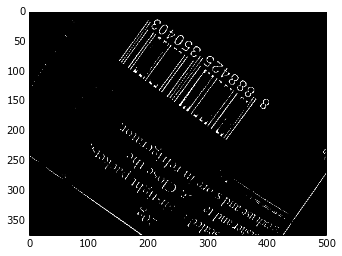

In [34]:
imshow(image_th,'gray'); show();

# Hough Transform & Image Blocking

Total number of 93x125 blocks: 16.
No lines found in block 0.


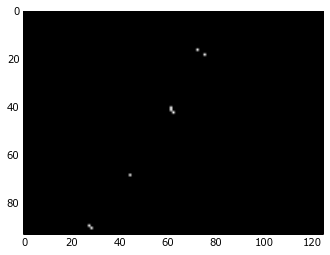

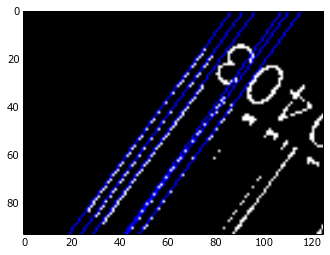

No lines found in block 2.


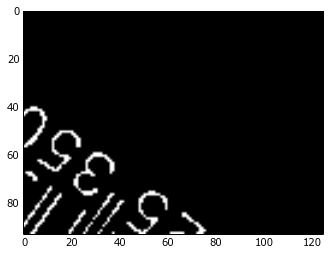

No lines found in block 3.


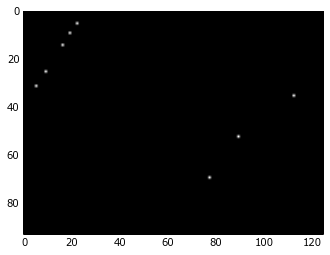

No lines found in block 4.


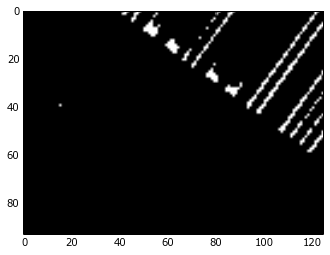

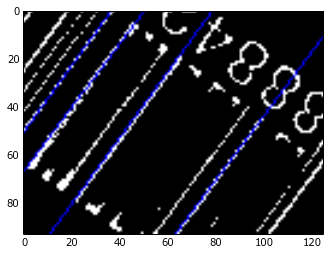

No lines found in block 6.


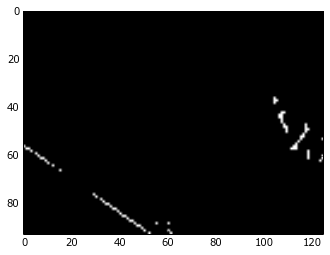

No lines found in block 7.


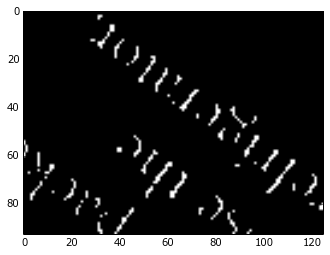

No lines found in block 8.


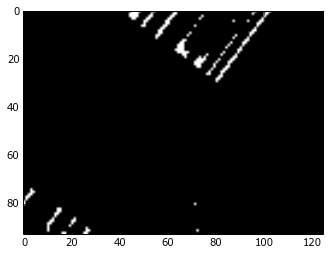

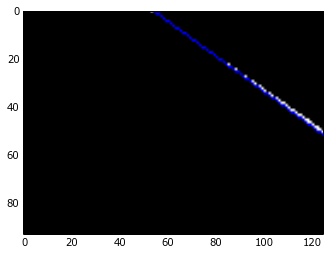

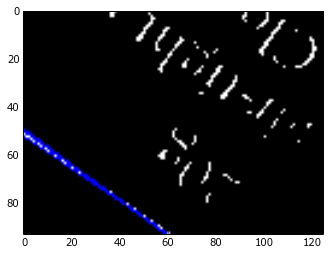

No lines found in block 11.


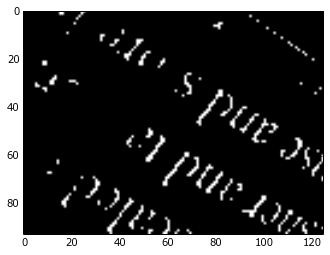

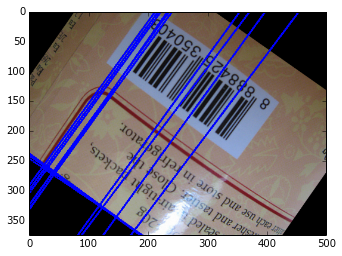

In [35]:
# Theta vector
theta = linspace(0,2*pi,1000)

# Hough Line Transform Matrix
H = matrix([cos(theta),sin(theta)])

# Define the window size
windowsize_r = rows/4
windowsize_c = cols/4

noof_blocks = image_th.shape[0]*image_th.shape[1]/(windowsize_r*windowsize_c);
print "Total number of " + str(windowsize_r) + "x" + str(windowsize_c) + " blocks: " + str(noof_blocks) + "."

# Crop out the window
counter = 0; noof_hits = 0;

rhos = zeros(noof_blocks);
image_blocks = zeros((windowsize_r,windowsize_c,noof_blocks), dtype=uint8);

for r in range(0,image_th.shape[0] - windowsize_r, windowsize_r):
    for c in range(0,image_th.shape[1] - windowsize_c, windowsize_c):
        image_blocks[:,:,counter] = image_th[r:r+windowsize_r,c:c+windowsize_c]
        hough_space = cv2.HoughLines(image_blocks[:,:,counter],1,pi/180,50);     
        backtorgb = cv2.cvtColor(image_blocks[:,:,counter],cv2.COLOR_GRAY2RGB)
        
        if hough_space != None:
            
            # Count number of hits for subplot
            noof_hits += 1;
            
            # Plot the image blocks with Hough lines.
            for rho,theta in hough_space[0]:
                a = cos(theta)
                b = sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
            
                cv2.line(backtorgb,(x1,y1),(x2,y2),(0,0,255),1)
                cv2.line(image_rgb,(c+x1,r+y1),(c+x2,r+y2),(0,0,255),2)
                
        else:
            None
            print "No lines found in block " + str(counter) + "."
        
        
        imshow(backtorgb); show();
        counter += 1;
imshow(image_rgb); show()